<a href="https://www.kaggle.com/code/nithishkumarsj23/task-1?scriptVersionId=96127821" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **TSF GRIP Task-1**

**Predict the percentage of an student based on the no. of study hours
\
Simple linear regression involves just 2 variables**

*Dataset* : https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

***Nithish Kumar S J***

***1.IMPORTING THE LIBRARIES***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

***Loading the Dataset through a URL***

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)

***Returns the information about the Dataset***

In [3]:
data.info() #Returns the Information about the Dataset
print("\n"+data.to_string())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


***Trying to establish a relationship between the data by plotting a 2-D Graph*****

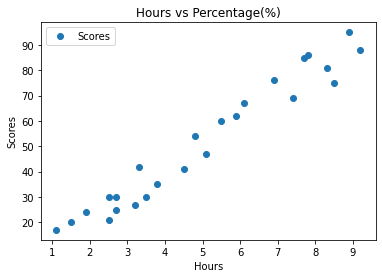

In [4]:
data.plot(x="Hours",y="Scores", style='o')
plt.title("Hours vs Percentage(%)")
plt.ylabel("Scores")
plt.show()


***Getting the data values of X & Y for training purposes***

***':' is used retrieve values for all the possible indexes*****

Training complete.


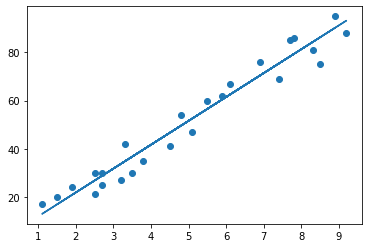

In [5]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values

#Splitting this data into Training Sets

from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

#Training the Algorithm

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training complete.")

#Plotting the regression line

line = regressor.coef_*X+regressor.intercept_ #Y= M*X + C

#Plotting the test data

plt.scatter(X, Y) 
plt.plot(X, line);
plt.show()

***Making Prediction***

In [6]:
print(X_test)     # Testing the data - In Hours
Y_pred = regressor.predict(X_test)   # Predicting the scores

#Comparing the actual result with predicted result

df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


***Testing with a self-defined data***

In [7]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

print("If a Student studies for "+str(hours)+"hrs/day, he might score = "+str("%.2f" % round(own_pred[0],2))+"%")

No of Hours = 9.25
Predicted Score = 93.69173248737539
If a Student studies for 9.25hrs/day, he might score = 93.69%


***Performance Evaluation***

In [8]:
from sklearn import metrics  
print('Mean Absolute Error: ', str("%.2f" % round(metrics.mean_absolute_error(Y_test, Y_pred),2))) 

Mean Absolute Error:  4.18
